#Titanic Disaster Data

In [44]:
import pandas as pd

In [45]:
data = pd.read_csv('train.csv')

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.shape

(891, 12)

In [48]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
#out of 12 one is going to be target data 
#so we just storing in variable for future use
cols = data.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
#for numerical/categorical u can use nunique to get count
#for categoical/numerical u use value_count

for col in cols :
  print(col, data[col].nunique())


PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [52]:
#we need to split x and y 
#y is a target value that is Survived column
y = data['Survived']
x = data.drop('Survived', axis = 1)


In [53]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Training Model
- after seperation of x and y we dont apply preprocessing
- we will apply it only after the training
- we apply preprocessing on both train and test model 
- we shld applu for only one

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2,random_state = 1)

In [55]:
x_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [56]:
#handelling missing value
x_train.Age = x_train.Age.fillna(x_train.Age.median())

In [57]:
x_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [58]:
#handellng missing values in test value
x_test.Age = x_test.Age.fillna(x_test.Age.median())

In [59]:
x_train.Embarked.value_counts()

S    513
C    133
Q     64
Name: Embarked, dtype: int64

In [60]:
#we have only 2 missing values it wont make difference
#so we are going it with c
import numpy as np
x_train.Embarked = x_train.Embarked.replace(np.nan , 'C')

In [61]:
x_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         0
dtype: int64

In [62]:
#their is no missing values in embarked in test data 
#so we no need to perform operations on it 
x_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

In [63]:
#canbin has too many missing values it can be replaced 
#even if we do it will give wrong result
#we also removing some of the column which is not helpful to us
drop_cols = ['Name','PassengerId','Ticket','Cabin']

In [64]:
x_train = x_train.drop(drop_cols,axis = 1)

In [65]:
x_train.shape

(712, 7)

In [66]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
#we also need to drop same columns from test
x_test = x_test.drop(drop_cols,axis = 1)

In [68]:
x_test.shape

(179, 7)

In [69]:
#to determine wat type od preprocessing techniques we going to use 
# we need to check the info and dtypes of data 
#it can either info() or dtypes

print(x_train.info())
print(x_train.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB
None
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


#preprocessig Techniques
- due to we have object nothing but a string in our data we need to process it in the numerical 
- for that we need to use preprocess technique OneHotEncoding or if their is no inherant ordering we can use  LabelEncoding(it wont increase too many features)
- but sex and embarked coulmn has different features for this type we shld use onehotencoding
- x_train['Sex] = le.fit_transform(x_train[['Sex']]) if we do label encoding it will create in a single coulmn which we dont want and also wrong method
- if we do the methodleogy to onehotencoder it will show ambigous error bcoz of shape problem 

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
ohe = OneHotEncoder()

ohe_columns = ohe.fit_transform(x_train[['Sex','Embarked']]) #it expects Dataframe


In [72]:
#it will in sparx format to convert it we need to use toarray()
ohe_columns.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [73]:
ohe_columns.toarray().shape

(712, 5)

In [74]:
#converting to Dataframe

ohe_columns = pd.DataFrame(ohe_columns.toarray(),columns=['s1','s2','e1','e2','e3'])
ohe_columns

,s1,s2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0


In [75]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [76]:
#pd.concat function to merge this with orginal data

x_train[['Pclass','Age','SibSp','Parch','Fare']]

,Pclass,Age,SibSp,Parch,Fare
301,3,29.0,2,0,23.2500
309,1,30.0,0,0,56.9292
516,2,34.0,0,0,10.5000
120,2,21.0,2,0,73.5000
570,2,62.0,0,0,10.5000
...,...,...,...,...,...
715,3,19.0,0,0,7.6500
767,3,30.5,0,0,7.7500
72,2,21.0,0,0,73.5000
235,3,29.0,0,0,7.5500


In [77]:
#while concating we will have a problem of index 
#we need to take care of it beforehand
#by this we can avoid the error or missing values in the data
#we need to compulsory use index if we are concating

x_train.reset_index(drop = True,inplace=True)
ohe_columns.reset_index(drop = True,inplace=True)

In [78]:
x_train = pd.concat([x_train[['Pclass','Age','SibSp','Parch','Fare']],ohe_columns], axis=1)

In [79]:
x_train

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,3,29.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
707,3,19.0,0,0,7.6500,0.0,1.0,0.0,0.0,1.0
708,3,30.5,0,0,7.7500,1.0,0.0,0.0,1.0,0.0
709,2,21.0,0,0,73.5000,0.0,1.0,0.0,0.0,1.0
710,3,29.0,0,0,7.5500,1.0,0.0,0.0,0.0,1.0


- we need to apply it on the test data too

In [80]:
ohe_test = ohe.transform(x_test[['Sex','Embarked']]) #it expects tobe Dataframe

In [81]:
ohe_test = pd.DataFrame(ohe_test.toarray(),columns=['s1','s2','e1','e2','e3'])
ohe_test

,s1,s2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [82]:
#while concating we will have a problem of index 
#we need to take care of it beforehand
#by this we can avoid the error or missing values in the data
#we need to compulsory use index if we are concating

x_test.reset_index(drop = True,inplace=True)
ohe_test.reset_index(drop = True,inplace=True)

In [83]:
x_test = pd.concat([x_test[['Pclass','Age','SibSp','Parch','Fare']],ohe_test], axis=1)

In [84]:
x_test

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,27.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,27.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,1,49.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
175,1,27.0,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
176,3,27.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
177,3,21.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0


In [85]:
print(x_train.shape)
print(x_test.shape)

(712, 10)
(179, 10)


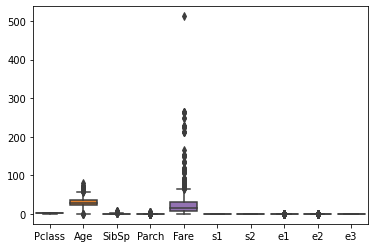

In [86]:
#to see ranges of different features
import seaborn as sns

sns.boxplot(data = x_train)

- we have differnt ranges in the feature it will cause problem 
- so we need to scale it 
- either standardscaler or MinMaxscaler

In [87]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)

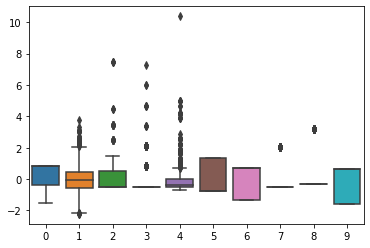

In [88]:
#now the ranges is changed

sns.boxplot(data = x_train)

In [89]:
x_test = ss.transform(x_test)

#Model Creation
#we selecting it as a Classification Model
- bigger the data training and testing will take time 
- in bagging which run in parllel 
- in boosting it run one by one (sequential) and this gradient boosting will take more time
- grid search time will take more time
- randomised is fast but we need to mention how much value it should take
- for practice we going to create all the classification model to check which is best and then we can tune it more
- but inreal world it may differ
- like this also we can import in single shot
   - from sklearn.linear_model import LogisticRegression,SGDClassifier

In [90]:
#to check time taken by model to execute u van use this one
import time
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

start = time.time()
logreg.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)



Time Taken : 0.01368093490600586


In [91]:
start = time.time()
print('Train Score : ',logreg.score(x_train,y_train))
print('Test Score : ',logreg.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.7935393258426966
Test Score :  0.7988826815642458
Time Taken : 0.009269237518310547


- in above model we see that logistic regression overfititng 
- traing data is more than testing data
- see we know accuracy is not great score so we can try f1 score / or ur preference
- if u want to compute is score u no need y_predict
- but for f1_score u need y_predict
-f1_score(truevalue,y_pred)

In [92]:
from sklearn.metrics import f1_score
y_pred = logreg.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

F1_Score :  0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


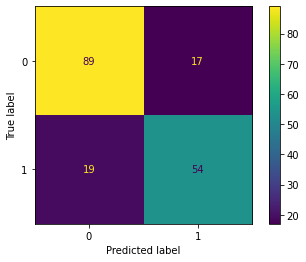

In [93]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test,y_test)

#SVM Model
- Logistic Regression performed very badly
- So we are trying different model

In [94]:
from sklearn.svm import SVC
svc = SVC()

start = time.time()
svc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.025986194610595703


In [95]:
start = time.time()
print('Train Score : ',svc.score(x_train,y_train))
print('Test Score : ',svc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.8553370786516854
Test Score :  0.776536312849162
Time Taken : 0.036974430084228516


F1_Score :  0.6610169491525425


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


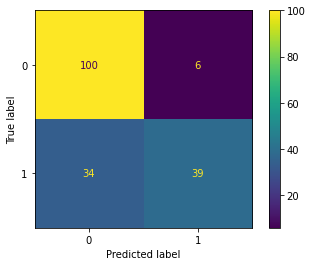

In [96]:
from sklearn.metrics import f1_score
y_pred = svc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test,y_test)

#KNN Model

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

start = time.time()
knn.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.0014476776123046875


In [98]:
start = time.time()
print('Train Score : ',knn.score(x_train,y_train))
print('Test Score : ',knn.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.8567415730337079
Test Score :  0.7653631284916201
Time Taken : 0.03840923309326172


F1_Score :  0.6666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


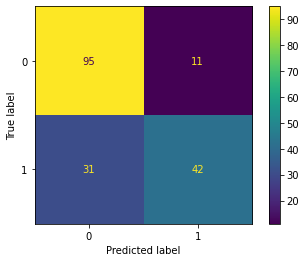

In [99]:
from sklearn.metrics import f1_score
y_pred = knn.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,x_test,y_test)

#Decision Tree Classifier
- feature importance can be used for further process in like PCA Feature Reduction,or feature selection techniques

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

start = time.time()
dtc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.002163410186767578


In [101]:
start = time.time()
print('Train Score : ',dtc.score(x_train,y_train))
print('Test Score : ',dtc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9831460674157303
Test Score :  0.7541899441340782
Time Taken : 0.008682727813720703


F1_Score :  0.6764705882352942


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


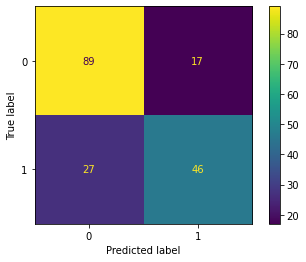

In [102]:
from sklearn.metrics import f1_score
y_pred = dtc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc,x_test,y_test)

In [103]:
dtc.feature_importances_

array([0.12692909, 0.22022211, 0.06598979, 0.03337368, 0.21712628,
       0.31211056, 0.        , 0.01373769, 0.00121282, 0.00929798])

#Ensemble Learning
#RandomForest

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

start = time.time()
rfc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.17976856231689453


In [105]:
start = time.time()
print('Train Score : ',rfc.score(x_train,y_train))
print('Test Score : ',rfc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9831460674157303
Test Score :  0.7988826815642458
Time Taken : 0.05826973915100098


F1_Score :  0.7230769230769231


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


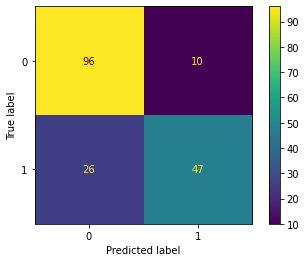

In [106]:
from sklearn.metrics import f1_score
y_pred = rfc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,x_test,y_test)

#Gradient Boosting Classifier


In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

start = time.time()
gbc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.1133425235748291


In [108]:
start = time.time()
print('Train Score : ',gbc.score(x_train,y_train))
print('Test Score : ',gbc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9073033707865169
Test Score :  0.7877094972067039
Time Taken : 0.008446931838989258


F1_Score :  0.6833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


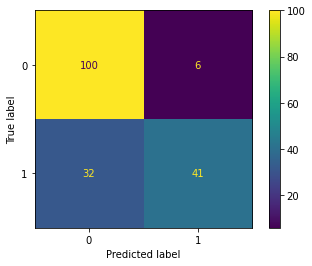

In [109]:
from sklearn.metrics import f1_score
y_pred = gbc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc,x_test,y_test)

# Naive Bayes
- when the data is textual and convert to bag of word like conutvectorize we use multinomialNB
- when the data is numerical like we have now we need t use GaussianNB 

In [110]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

start = time.time()
gb.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.0019330978393554688


In [111]:
start = time.time()
print('Train Score : ',gb.score(x_train,y_train))
print('Test Score : ',gb.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.797752808988764
Test Score :  0.770949720670391
Time Taken : 0.013786554336547852


F1_Score :  0.7132867132867133


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


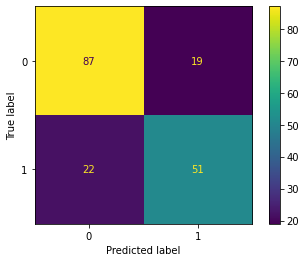

In [112]:
from sklearn.metrics import f1_score
y_pred = gb.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gb,x_test,y_test)

#SGD Classifier

In [113]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

start = time.time()
sgd.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.0060272216796875


In [114]:
start = time.time()
print('Train Score : ',sgd.score(x_train,y_train))
print('Test Score : ',sgd.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.6839887640449438
Test Score :  0.6256983240223464
Time Taken : 0.0059871673583984375


F1_Score :  0.48854961832061067


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


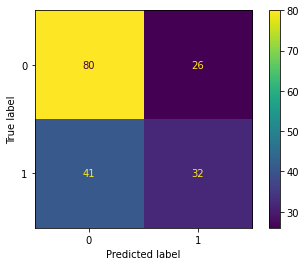

In [115]:
from sklearn.metrics import f1_score
y_pred = sgd.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd,x_test,y_test)

#Tuning Model
- Once we tested the model
- we need to tune the model
- lets consider Decsion Tree classifier to tune then proceed accordingly
- but in real we need to do all the above models and take the best one and then we need to tune that particular model to perfection.
- if the below tunning value also can be selected and done for the best model 
- so instead of dtc we can use the best model their with their parameters

#Randomized Search CV
- we are doing it for logistic regression bcoz it is the best 

In [116]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [120]:
param_dist = {'C':[0.001,0.01,0.1,1,10,100,1000],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [122]:
#n_iter it shld be 18 depth =3,sampleleaf =3 ,criterion = 2
#so 3*3*2 = 18 but due to take time we are reducing it 
#in rscv if u pass 18 iter but in  its cv is 3 to 5 fold 
#so if u consider that 18*5 = ? that much model it will produce 
#but dur to time consuption cv = 3 we will give 
rscv = RandomizedSearchCV(logreg,param_distributions=param_dist,n_iter = 10,cv = 5)
rscv.fit(x_train,y_train)
print('Best Parameters : ',rscv.best_params_)
print('Best Estimator : ',rscv.best_estimator_)
print('RSCV Test Score : ',rscv.score(x_test,y_test))

Best Parameters :  {'solver': 'sag', 'C': 10}
Best Estimator :  LogisticRegression(C=10, solver='sag')
RSCV Test Score :  0.7988826815642458


#GridSearchCv

In [124]:
gs = GridSearchCV(logreg,param_grid=param_dist,cv = 5)
gs.fit(x_train,y_train)
print('Best Parameters : ',gs.best_params_)
print('Best Estimator : ',gs.best_estimator_)
print('RSCV Test Score : ',gs.score(x_test,y_test))
print('RSCV best Score : ',gs.best_score_)

Best Parameters :  {'C': 1, 'solver': 'newton-cg'}
Best Estimator :  LogisticRegression(C=1, solver='newton-cg')
RSCV Test Score :  0.7988826815642458
RSCV best Score :  0.8020092583472864


#it is Proven that Logistic Regression is the BEST Out of all Classification Model for this Data
- Actually for Linear data logistic regression is best in classification model
- so further we need to do Randomsearch or Gridsearch using RandomForest to find the best parameters for further tunning then the score need to be submitted 

In [126]:
log = LogisticRegression(C = 1, solver = 'newton-cg')
log.fit(x_train,y_train)
print('Train Score : ',log.score(x_train,y_train))
print('Test Score : ',log.score(x_test,y_test))

Train Score :  0.7935393258426966
Test Score :  0.7988826815642458


F1_Score :  0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


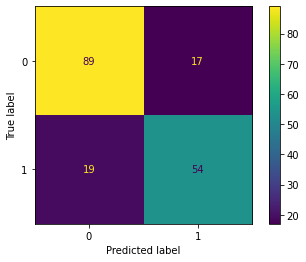

In [127]:
#for testing data
y_pred = log.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

plot_confusion_matrix(log,x_test,y_test)

F1_Score :  0.722117202268431


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


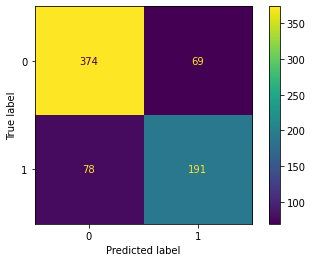

In [128]:
#for training data
y_pred_t = log.predict(x_train)
print('F1_Score : ',f1_score(y_train,y_pred_t))

plot_confusion_matrix(log,x_train,y_train)